In [19]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold

In [2]:
data = pd.read_csv("life_expectancy_clean.csv")


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [21]:
X = data.drop('Life expectancy ',axis=1)
y = data['Life expectancy ']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7)

In [24]:
X_test

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2257,Senegal,2007,Developing,23.0,22,0.32,8.309153,94.0,11,2.3,...,93.0,4.72,94.0,0.7,95.397852,11873557.0,11.0,1.9,0.425,6.8
1179,Iceland,2006,Developed,61.0,0,7.20,1003.139804,NaN,0,57.4,...,97.0,8.96,97.0,0.1,5613.541150,33782.0,0.9,0.9,0.884,18.1
619,Congo,2004,Developing,48.0,9,2.58,0.000000,NaN,3524,21.2,...,67.0,2.56,67.0,6.3,NaN,NaN,9.0,8.6,0.497,9.2
2514,Sweden,2006,Developed,64.0,0,6.50,6369.516139,NaN,19,55.7,...,98.0,8.95,98.0,0.1,46256.471600,9855.0,1.3,1.3,0.892,15.9
2134,Romania,2000,Developed,175.0,4,10.16,152.636890,98.0,35,51.4,...,99.0,4.33,99.0,0.1,1668.162731,22442971.0,4.0,4.3,0.703,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Belgium,2010,Developed,81.0,0,10.22,665.735612,97.0,40,61.9,...,98.0,1.17,98.0,0.1,4438.237410,1895586.0,0.9,0.9,0.878,15.9
1614,Maldives,2003,Developing,112.0,0,1.75,491.497891,98.0,75,16.7,...,98.0,5.90,98.0,0.1,3432.247841,34.0,14.6,14.7,0.601,11.8
2203,Samoa,2012,Developing,136.0,0,0.01,492.055226,64.0,1,73.4,...,62.0,5.20,64.0,0.1,4234.554443,189194.0,0.2,0.1,0.698,12.9
730,Democratic Republic of the Congo,2006,Developing,36.0,235,1.53,0.000000,NaN,80123,17.3,...,62.0,3.39,62.0,2.0,NaN,NaN,11.3,11.1,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [18]:
data['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

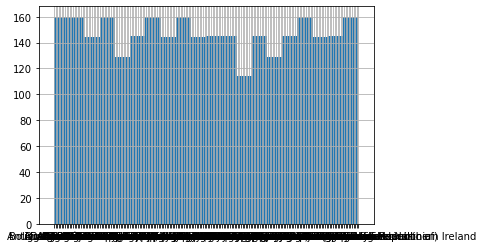

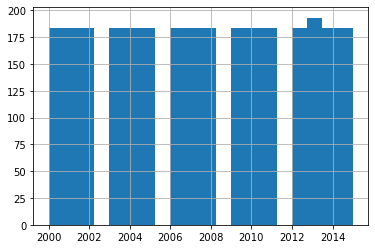

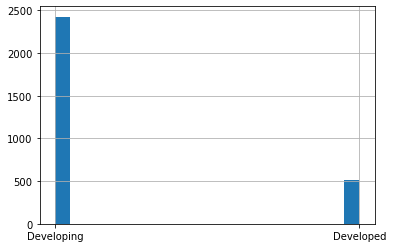

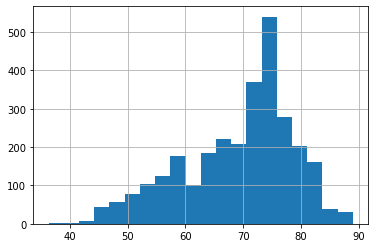

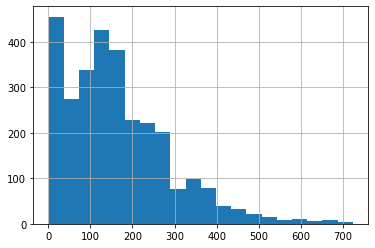

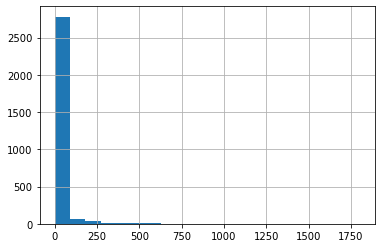

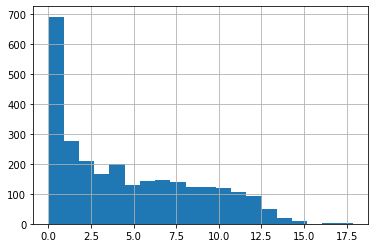

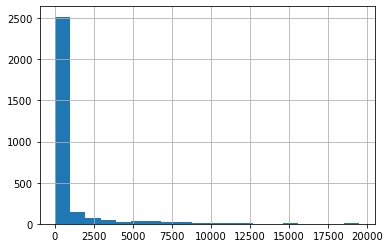

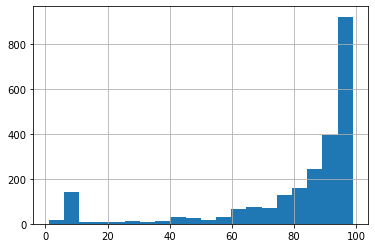

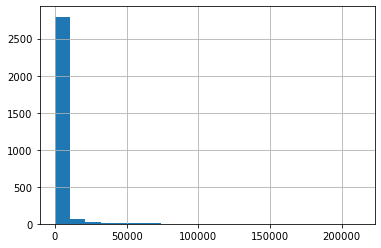

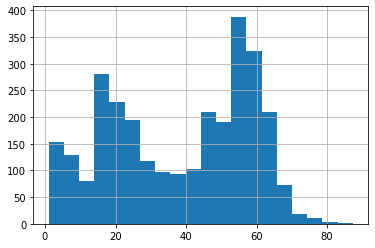

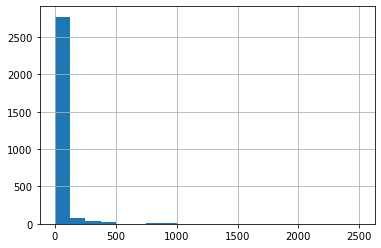

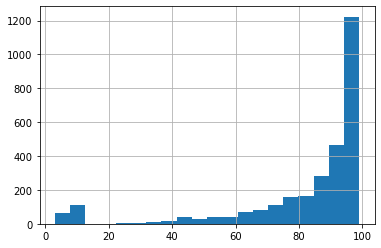

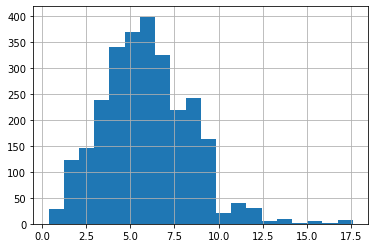

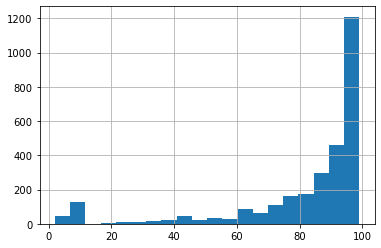

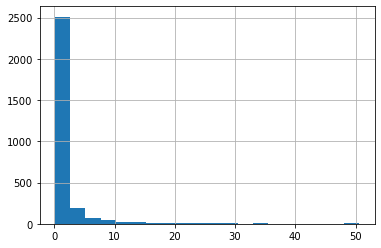

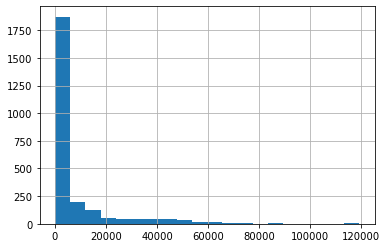

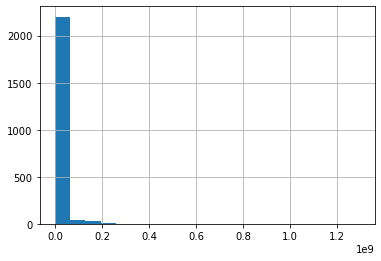

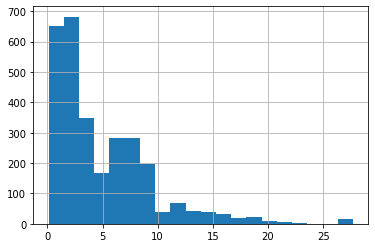

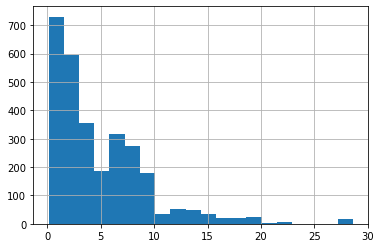

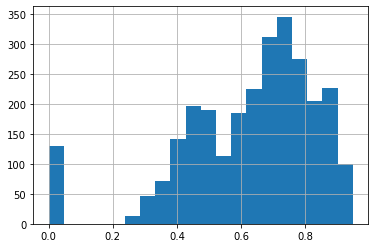

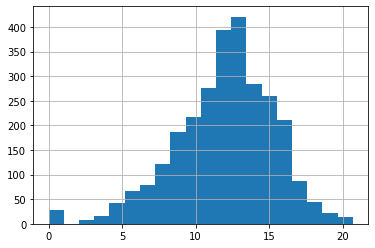

In [14]:
for column in data:
    data[column].hist(bins=20)
    plt.show()

In [4]:

params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)
clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

ValueError: not enough values to unpack (expected 2, got 1)